In [1]:
import matplotlib.pyplot as pl
import numpy
import random

In [2]:
class Hnn:
    def __init__(self, in_dim, max_iter):
        self.in_dim = in_dim 
        self.max_iter = max_iter

        self.cache = []
        self.width = in_dim ** 2

        self.weights = numpy.zeros((self.width, self.width), dtype=numpy.float32)
    
    def tr(self, i):
        return i // self.in_dim, i % self.in_dim

    def chk(self, dat):
        for cached in self.cache:
            if numpy.array_equal(cached, dat):
                return True
        return False

    def fit(self, inp):
        self.cache.append(inp)
        for i in range(self.width):
            for j in range(self.width):
                if i != j:
                    x, y = self.tr(i)
                    m, n = self.tr(j)

                    self.weights[i, j] += inp[x, y] * inp[m, n]
                else:
                    self.weights[i, j] = 0

    def pred(self, inp):
        total_iter, mis_iter, outp = 0, 0, inp.copy()
        while not self.chk(outp):
            total_iter += 1
            cur_idx = random.randint(0, self.width - 1)
            predw = 0
            for i in range(self.width):
                x, y = self.tr(i)
                predw += outp[x, y] * self.weights[i, cur_idx]

            predw = 1 if predw > 0 else -1
            x, y = self.tr(cur_idx)
            if predw != outp[x, y]:
                outp[x, y] = predw
            mis_iter = 0 if predw != outp[x, y] else mis_iter + 1

            if mis_iter >= self.max_iter:
                return False, outp, total_iter
        return True, outp, total_iter

In [3]:
class Input:
    def __init__(self, label, data):
        data = numpy.array(data)
        self.label = label
        self.data = numpy.where(data == 0, -1, data)
        self.origin = data
        self.results = {}

    def all_noised(self, min_n, max_n, step=10, need_level=True):
        for level in range(min_n, max_n + step, step):
            if need_level:
                yield level, self.noised(level)
            else:
                yield self.noised(level)
        
    def fit(self, model):
        pl.imshow(self.data, cmap='gray')
        model.fit(self.data)

    def noised(self, level):
        out = self.data.copy()
        for x in range(out.shape[1]):
            for y in range(out.shape[0]): 
                if random.randint(0, 100) <= level:
                    out[y][x] = self.data[y][x] * -1
        return out 

    def process(self, model):
        images = []
        for level, image in self.all_noised(0, 100):
            image = self.noised(level)
            rec, out, it = model.pred(image)
            self.results[level] = (rec, out, it)
            images.append(image)
        return images

In [4]:
model = Hnn(10, 1000)

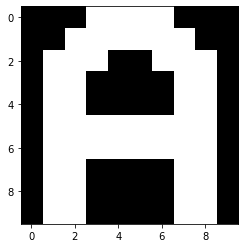

In [16]:
a = Input("A", [
    [0, 0, 0, 1, 1, 1, 1, 0, 0, 0],
    [0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
    [0, 1, 1, 1, 0, 0, 1, 1, 1, 0],
    [0, 1, 1, 0, 0, 0, 0, 1, 1, 0],
    [0, 1, 1, 0, 0, 0, 0, 1, 1, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
    [0, 1, 1, 0, 0, 0, 0, 1, 1, 0],
    [0, 1, 1, 0, 0, 0, 0, 1, 1, 0],
    [0, 1, 1, 0, 0, 0, 0, 1, 1, 0],
])
a.fit(model)

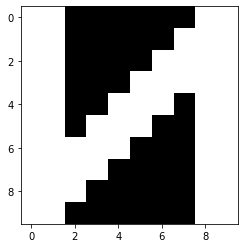

In [17]:
b = Input("И", numpy.array([
    [1, 1, 0, 0, 0, 0, 0, 0, 1, 1],
    [1, 1, 0, 0, 0, 0, 0, 1, 1, 1],
    [1, 1, 0, 0, 0, 0, 1, 1, 1, 1],
    [1, 1, 0, 0, 0, 1, 1, 1, 1, 1],
    [1, 1, 0, 0, 1, 1, 1, 0, 1, 1],
    [1, 1, 0, 1, 1, 1, 0, 0, 1, 1],
    [1, 1, 1, 1, 1, 0, 0, 0, 1, 1],
    [1, 1, 1, 1, 0, 0, 0, 0, 1, 1],
    [1, 1, 1, 0, 0, 0, 0, 0, 1, 1],
    [1, 1, 0, 0, 0, 0, 0, 0, 1, 1],
]))
b.fit(model)

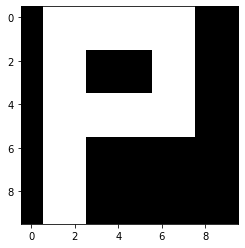

In [18]:
c = Input("Р", numpy.array([
    [0, 1, 1, 1, 1, 1, 1, 1, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 0, 0],
    [0, 1, 1, 0, 0, 0, 1, 1, 0, 0],
    [0, 1, 1, 0, 0, 0, 1, 1, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 0, 0],
    [0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
]))
c.fit(model)

In [19]:
def grid(array, ncols=4, pad=2):
    if isinstance(array, list):
        array = numpy.array([numpy.pad(x, pad) for x in array])
    nindex, height, width = array.shape
    nrows = nindex//ncols
    result = (array.reshape(nrows, ncols, height, width, 1)
              .swapaxes(1,2)
              .reshape(height*nrows, width*ncols, 1))
    return result

In [20]:
def magic(inp):
    fig, ax = pl.subplots(2, 2, figsize=(24, 24))
    
    print('Label %s' % (inp.label, ))
    processed = inp.process(model)
    ax[0][0].set_title('Input images')
    ax[0][0].imshow(grid([inp.data] + processed, 4), cmap='gray')
    
    outs = [inp.data]
    iters = {}
    recs = {}
    for level, res in inp.results.items():
        rec, out, iterc = res
        iters[level] = iterc
        recs[level] = rec * 1.0
        outs.append(out)
        print('Level %3d : %r at %4d iters' % (level, rec, iterc))
    ax[0][1].set_title('Adjusted images')
    ax[0][1].imshow(grid(outs, 4), cmap='gray')
    
    ax[1][0].set_title('Iteration count from noise level')
    ax[1][0].plot(iters.keys(), iters.values())
    
    ax[1][1].set_title('Recognized result from noise level')
    ax[1][1].plot(recs.keys(), recs.values())

Label A
Level   0 : True at    0 iters
Level  10 : True at  323 iters
Level  20 : True at  451 iters
Level  30 : True at  593 iters
Level  40 : True at  426 iters
Level  50 : False at 1000 iters
Level  60 : False at 1000 iters
Level  70 : False at 1000 iters
Level  80 : False at 1000 iters
Level  90 : False at 1000 iters
Level 100 : False at 1000 iters


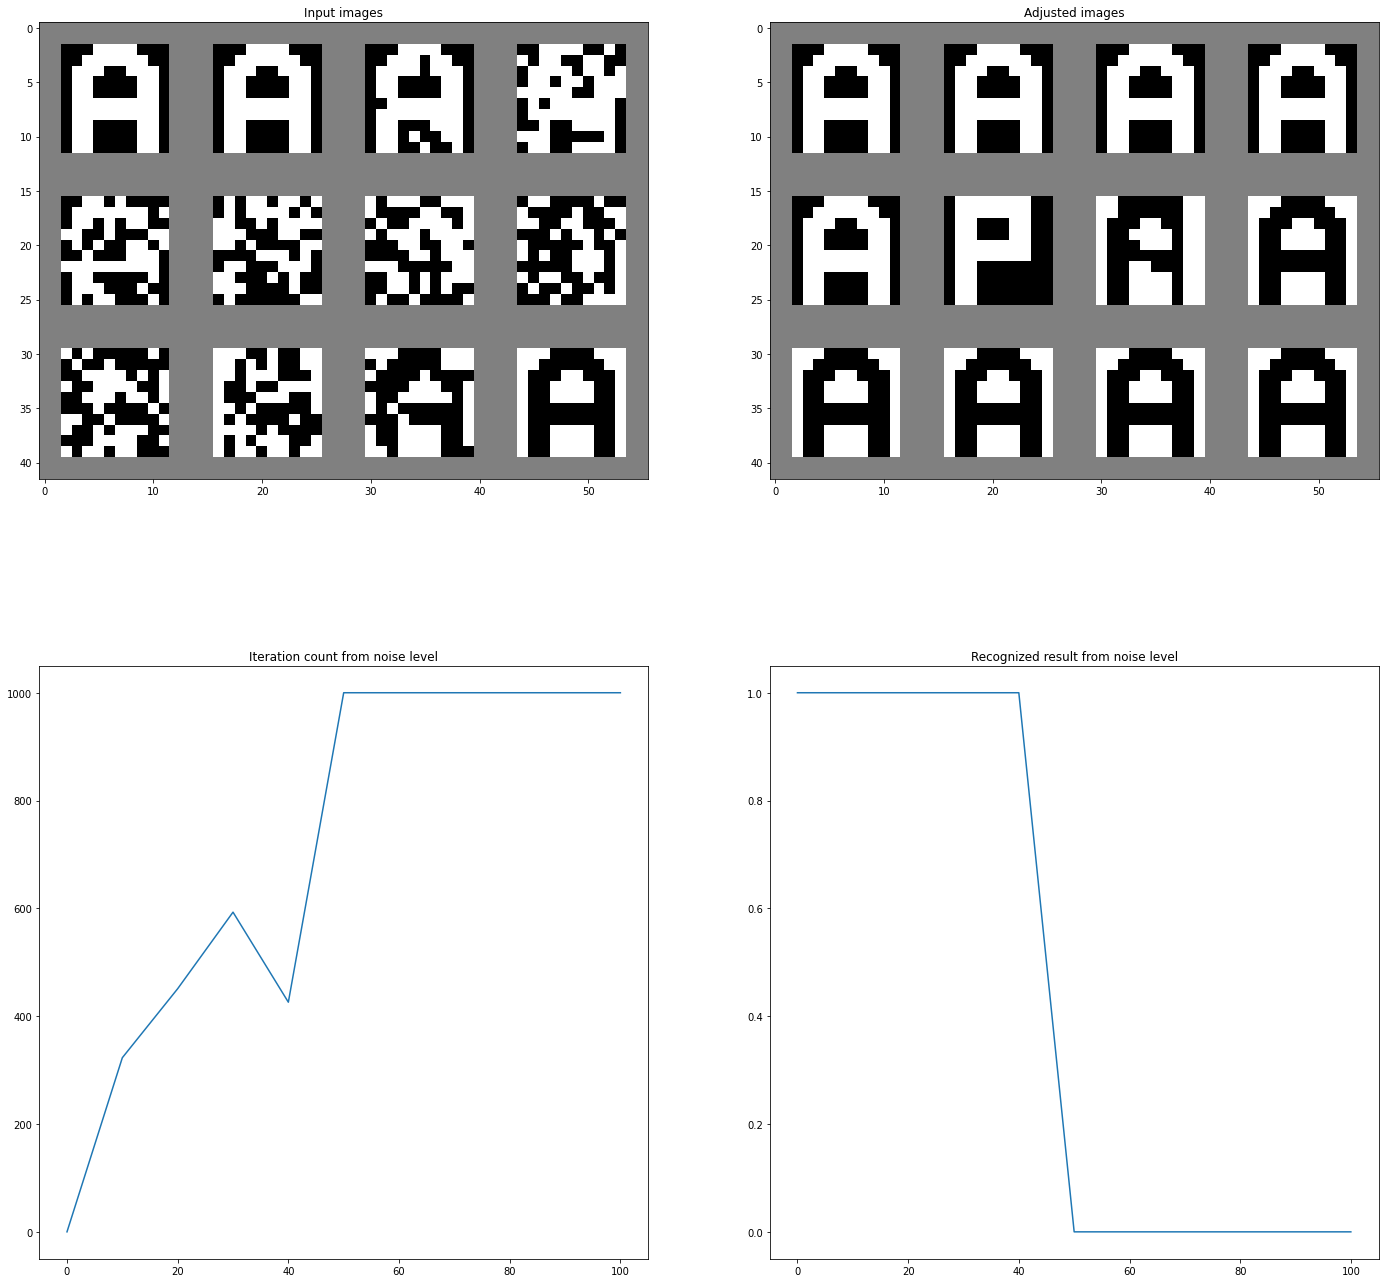

In [21]:
magic(a)

Label И
Level   0 : True at    0 iters
Level  10 : True at  334 iters
Level  20 : True at  402 iters
Level  30 : True at  259 iters
Level  40 : True at  433 iters
Level  50 : False at 1000 iters
Level  60 : False at 1000 iters
Level  70 : False at 1000 iters
Level  80 : False at 1000 iters
Level  90 : False at 1000 iters
Level 100 : False at 1000 iters


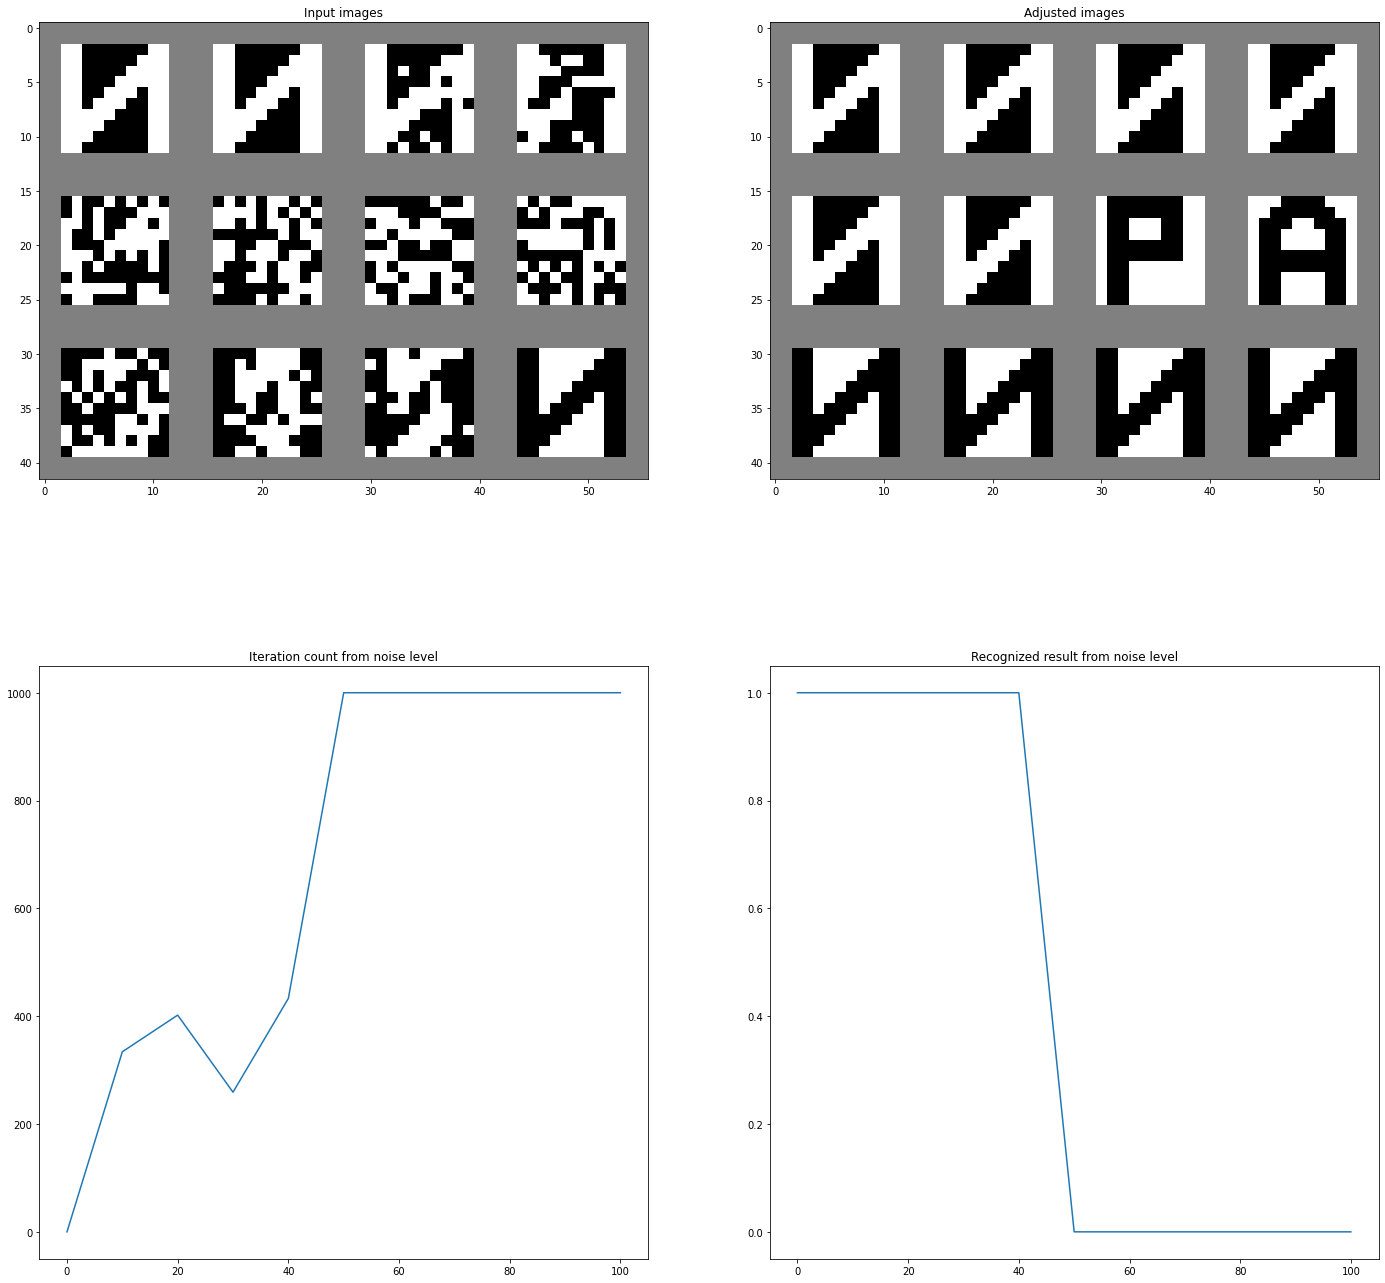

In [22]:
magic(b)

Label Р
Level   0 : True at   43 iters
Level  10 : True at  532 iters
Level  20 : True at  247 iters
Level  30 : True at  289 iters
Level  40 : False at 1000 iters
Level  50 : False at 1000 iters
Level  60 : False at 1000 iters
Level  70 : False at 1000 iters
Level  80 : False at 1000 iters
Level  90 : False at 1000 iters
Level 100 : False at 1000 iters


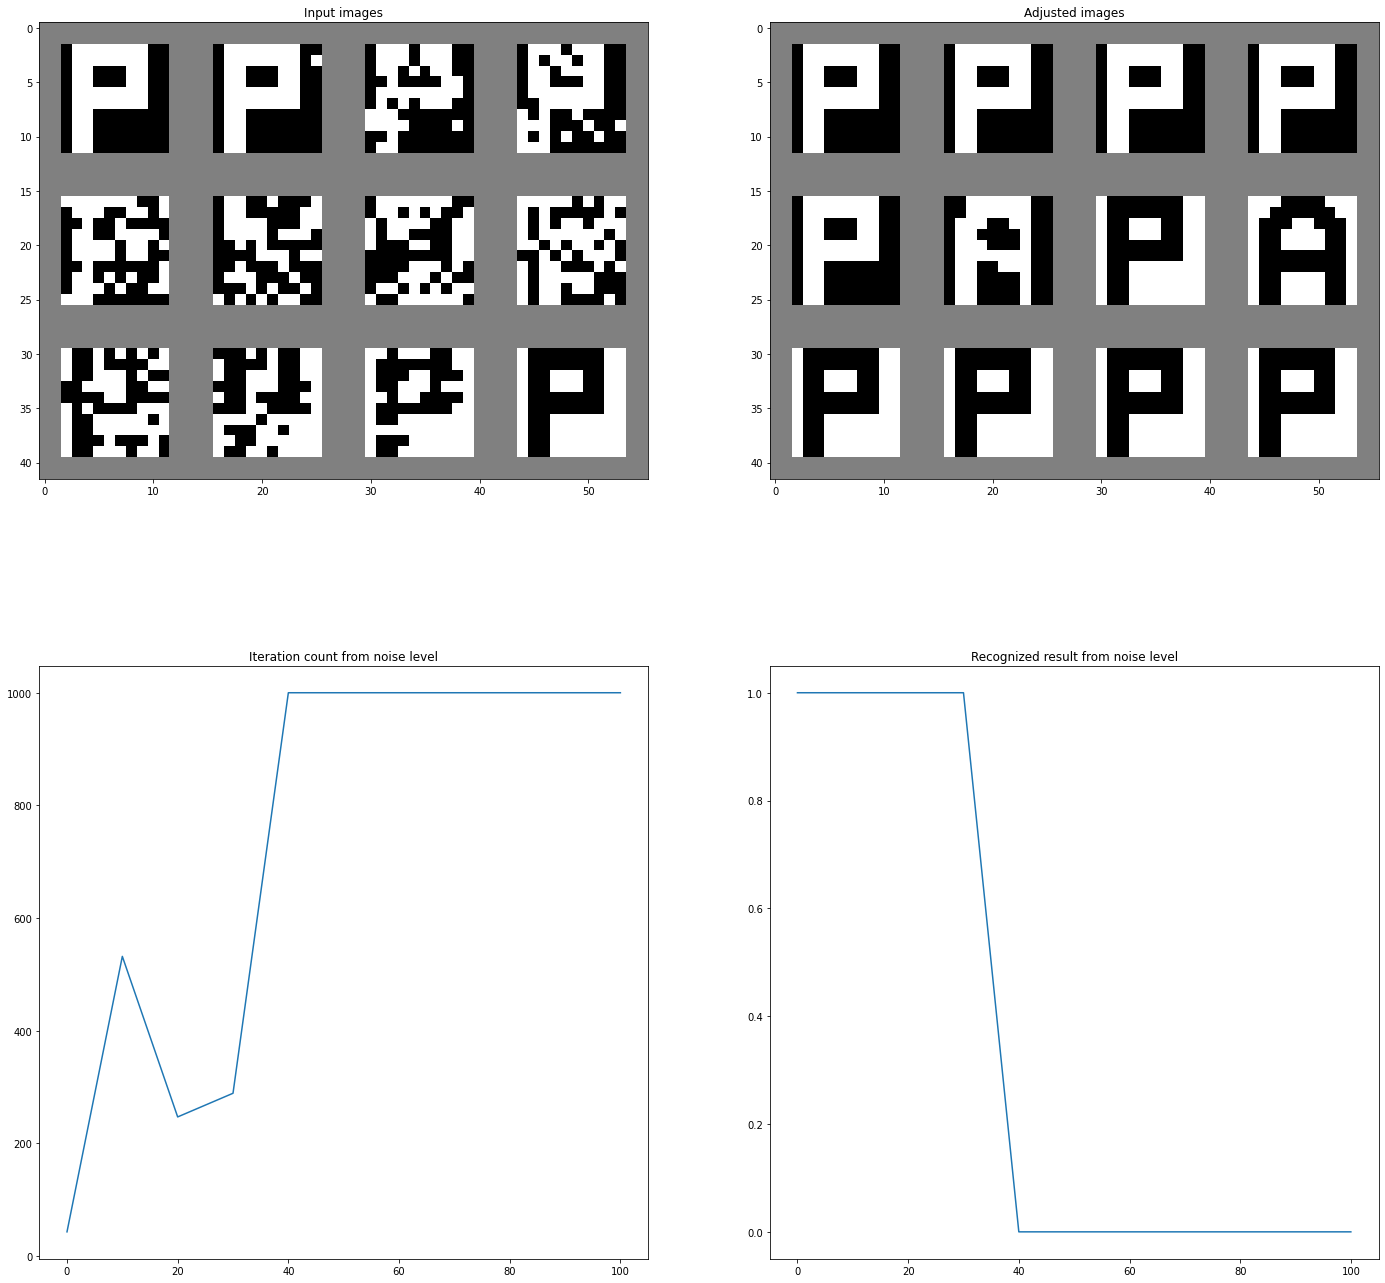

In [23]:
magic(c)